In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_directory = 'data/'
bike_trips = pd.read_csv(f'{data_directory}/combined_bike_trips_2023.csv')
stations = pd.read_csv(f'{data_directory}/manhattan_stations.csv')

In [16]:
bike_df = bike_trips.copy()

In [17]:
# Convert string to datetime objects
bike_df['started_at'] = pd.to_datetime(bike_df['started_at'])
bike_df['ended_at'] = pd.to_datetime(bike_df['ended_at'])

# Get trip_duration
bike_df['trip_duration'] = (bike_df['ended_at'] - bike_df['started_at']).dt.total_seconds()/60
bike_df = bike_df[bike_df['trip_duration'] > 0].copy() # ensure start_date is before end_date

# Get week for each observation
bike_df['week_started'] = bike_df['started_at'].dt.isocalendar().week
bike_df['week_ended'] = bike_df['ended_at'].dt.isocalendar().week

# Get month for each observation
bike_df['month_started'] = bike_df['started_at'].dt.month
bike_df['month_ended'] = bike_df['ended_at'].dt.month

In [18]:
bike_df.head(10)
# bike_df.describe()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,week_started,week_ended,month_started,month_ended
0,DC1CB984821DFFF7,classic_bike,2023-01-07 15:36:53.430,2023-01-07 15:39:45.406,Vesey St & Church St,5216.06,Albany St & Greenwich St,5145.02,40.712220,-74.010472,40.709267,-74.013247,member,2.866267,1,1,1,1
1,C00CA02971557F16,classic_bike,2023-01-04 19:23:01.234,2023-01-04 19:34:57.151,Lispenard St & Broadway,5391.06,St Marks Pl & 1 Ave,5626.13,40.719392,-74.002472,40.727791,-73.985649,member,11.931950,1,1,1,1
2,E4415A543C1972A7,classic_bike,2023-01-24 10:38:01.135,2023-01-24 10:41:40.749,E 5 St & Ave A,5626.06,E 1 St & 1 Ave,5593.01,40.724790,-73.984301,40.723356,-73.988650,member,3.660233,4,4,1,1
3,4FC76B63F9FE631F,classic_bike,2023-01-26 19:17:23.200,2023-01-26 19:47:05.287,W 59 St & 10 Ave,7023.04,E 1 St & 1 Ave,5593.01,40.770513,-73.988038,40.723356,-73.988650,member,29.701450,4,4,1,1
4,153486234EA3E427,electric_bike,2023-01-10 08:29:04.191,2023-01-10 08:33:49.274,Barrow St & Hudson St,5805.05,Washington St & Gansevoort St,6039.06,40.731724,-74.006744,40.739323,-74.008119,member,4.751383,2,2,1,1
5,D24D370D9CE13CB4,classic_bike,2023-01-11 08:32:01.889,2023-01-11 08:38:26.498,Barrow St & Hudson St,5805.05,Washington St & Gansevoort St,6039.06,40.731724,-74.006744,40.739323,-74.008119,member,6.410150,2,2,1,1
6,98E7D95A8B9B2249,classic_bike,2023-01-01 16:40:29.769,2023-01-01 16:48:04.256,Barrow St & Hudson St,5805.05,Washington St & Gansevoort St,6039.06,40.731724,-74.006744,40.739323,-74.008119,member,7.574783,52,52,1,1
7,9ABD445191B6E224,classic_bike,2023-01-29 14:27:25.595,2023-01-29 14:38:48.023,Barrow St & Hudson St,5805.05,St Marks Pl & 1 Ave,5626.13,40.731724,-74.006744,40.727791,-73.985649,member,11.373800,4,4,1,1
8,01D7ACD6AE19CC69,classic_bike,2023-01-09 09:01:26.183,2023-01-09 09:11:28.461,6 Ave & W 33 St,6364.07,E 47 St & Park Ave,6584.12,40.749013,-73.988484,40.755103,-73.974987,member,10.037967,2,2,1,1
9,044C13BF6237E402,classic_bike,2023-01-26 07:22:25.970,2023-01-26 07:30:34.377,6 Ave & W 33 St,6364.07,E 27 St & 1 Ave,6004.06,40.749013,-73.988484,40.739445,-73.976806,member,8.140117,4,4,1,1


In [19]:
# Extract the Autumn Season Months (September, October, November)
autumn_bike_df = bike_df[bike_df['month_started'].isin([9, 10, 11]) & bike_df['month_ended'].isin([9, 10, 11])].copy()

In [23]:
# Verify extracted months are 9, 10, 11
print(autumn_bike_df['month_started'].unique())
print(autumn_bike_df['month_ended'].unique())

[ 9 10 11]
[ 9 10 11]


In [24]:
# See the week numbers
print(autumn_bike_df['week_started'].unique())
print(autumn_bike_df['week_ended'].unique())

<IntegerArray>
[36, 37, 35, 38, 39, 41, 40, 42, 43, 44, 47, 48, 46, 45]
Length: 14, dtype: UInt32
<IntegerArray>
[36, 37, 35, 38, 39, 41, 40, 42, 43, 44, 47, 48, 46, 45]
Length: 14, dtype: UInt32


In [31]:
# See number of unique stations
print(len(autumn_bike_df["start_station_id"].unique()), "Starting stations")
print(len(autumn_bike_df["end_station_id"].unique()), "Ending stations")

605 Starting stations
605 Ending stations


In [25]:
# Calculate the mean weekly trips for each stations
mean_weekly_trips = autumn_bike_df.groupby(['start_station_id', 'week_started']).size().groupby(level=0).mean()
mean_weekly_trips = mean_weekly_trips.reset_index(name='MEAN_WEEKLY_TRIPS')
mean_weekly_trips['MEAN_WEEKLY_TRIPS'] = mean_weekly_trips['MEAN_WEEKLY_TRIPS'].astype(int)

In [ ]:
# Glimpse at the values
mean_weekly_trips

# Note only 605 stations have recorded trips

,start_station_id,MEAN_WEEKLY_TRIPS
0,4846.01,313
1,4889.06,248
2,4920.13,27
3,4953.04,405
4,4962.01,241
...,...,...
600,8679.03,11
601,8696.05,4
602,8715.01,17
603,8715.06,14


In [ ]:
# Add mean weekly trips of each station to the stations data set
merged_df = pd.merge(stations, mean_weekly_trips, left_on='station_id', right_on='start_station_id', how='left')
# Replace empty demand with 0 mean weekly trips
merged_df["MEAN_WEEKLY_TRIPS"].fillna(0, inplace=True)

In [64]:
# Check total number of unique stations
len(stations["station_id"].unique())

662

In [65]:
merged_df

,station_id,station_name,capacity,lng,lat,start_station_id,MEAN_WEEKLY_TRIPS
0,5772.05,Morton St & Greenwich St,56,-74.008870,40.731150,NaN,0.0
1,6560.15,Broadway & W 38 St,68,-73.987349,40.752973,6560.15,511.0
2,7727.07,Amsterdam Ave & W 119 St,29,-73.959621,40.808625,NaN,0.0
3,6569.08,W 35 St & Dyer Ave,41,-73.997402,40.754692,6569.08,206.0
4,7023.04,W 59 St & 10 Ave,117,-73.988038,40.770513,7023.04,341.0
...,...,...,...,...,...,...,...
657,8416.10,W 186 St & St Nicholas Ave,26,-73.931308,40.852253,8416.10,8.0
658,4846.01,South St & Whitehall St,55,-74.012342,40.701221,4846.01,313.0
659,6890.01,W 53 St & 10 Ave,29,-73.990617,40.766697,6890.01,424.0
660,6483.06,W 36 St & 7 Ave,38,-73.989539,40.752149,6483.06,173.0


In [70]:
# Select wanted columns
final_df = merged_df[['station_id','station_name','capacity','lng','lat','MEAN_WEEKLY_TRIPS']].copy()
print(f"column names: \n{final_df.columns}")
print("")
print(f"Checking for null values \n{final_df[['station_id', 'MEAN_WEEKLY_TRIPS', 'capacity']].isnull().sum()}")

column names: 
Index(['station_id', 'station_name', 'capacity', 'lng', 'lat',
       'MEAN_WEEKLY_TRIPS'],
      dtype='object')

Checking for null values 
station_id           0
MEAN_WEEKLY_TRIPS    0
capacity             0
dtype: int64


In [71]:
# Step 1: Min-max normalize the 'capacity' column
min_capacity = final_df['capacity'].min()
max_capacity = final_df['capacity'].max()

final_df['NORMALISED_CAPACITY'] = (final_df['capacity'] - min_capacity) / (max_capacity - min_capacity)

# Step 2: Calculate the demand score (N) for each station
small_constant = 0.001

# Demand score = mean * (1 - relative_capacity + e)
final_df['DEMAND_SCORE'] = final_df['MEAN_WEEKLY_TRIPS'] * (1 - final_df['NORMALISED_CAPACITY'] + small_constant)
final_df['DEMAND_SCORE'].describe()

count    662.000000
mean     166.890942
std      138.587444
min        0.000000
25%       40.504833
50%      150.014667
75%      257.689250
max      780.824333
Name: DEMAND_SCORE, dtype: float64

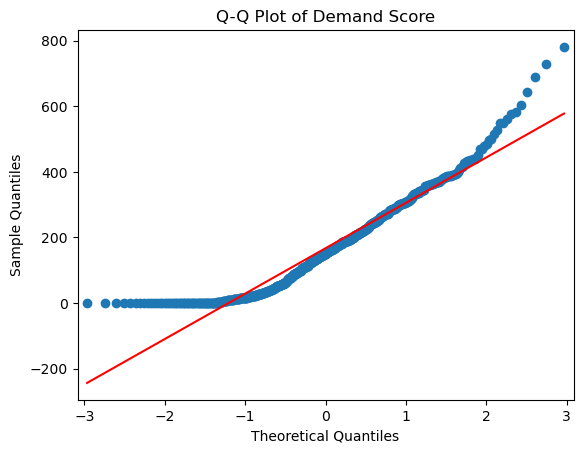

In [72]:
import statsmodels.api as sm

# Create the Q-Q plot
fig = sm.qqplot(final_df['DEMAND_SCORE'], line='s') # 's' for standardized line
plt.title('Q-Q Plot of Demand Score')
plt.show()

# HOW TO READ:
# If the data points fall along the red line, you can say that the distribution of the demand score is follows a normal distribution.
# If that is the case, a quantile categorisation will be suitable
# In our case, there are some mismatch, so I chose K-Means

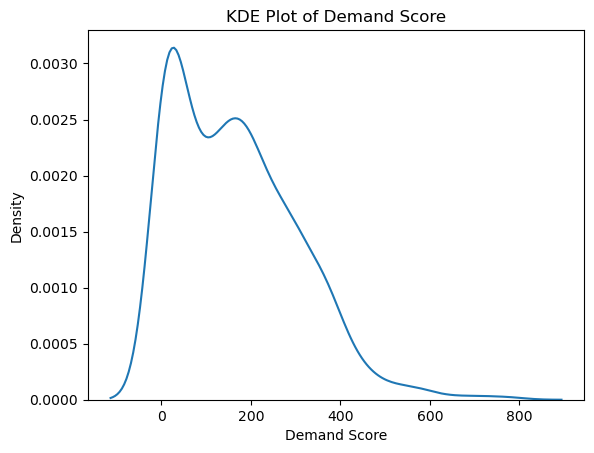

In [73]:
import seaborn as sns

sns.kdeplot(final_df['DEMAND_SCORE'])
plt.xlabel('Demand Score')
plt.ylabel('Density')
plt.title('KDE Plot of Demand Score')
plt.show()

# HOW TO READ:
# Just a smooth curve to see the distribution

In [ ]:
from sklearn.cluster import KMeans

# Do a K-Means clustering
num_clusters = 4
kmeans = KMeans(n_clusters= num_clusters, random_state=42, n_init=10)
final_df['DEMAND_CATEGORY'] = kmeans.fit_predict(final_df[['DEMAND_SCORE']])

In [76]:
final_df['DEMAND_CATEGORY'].value_counts()

0    252
2    221
1    158
3     31
Name: DEMAND_CATEGORY, dtype: int64

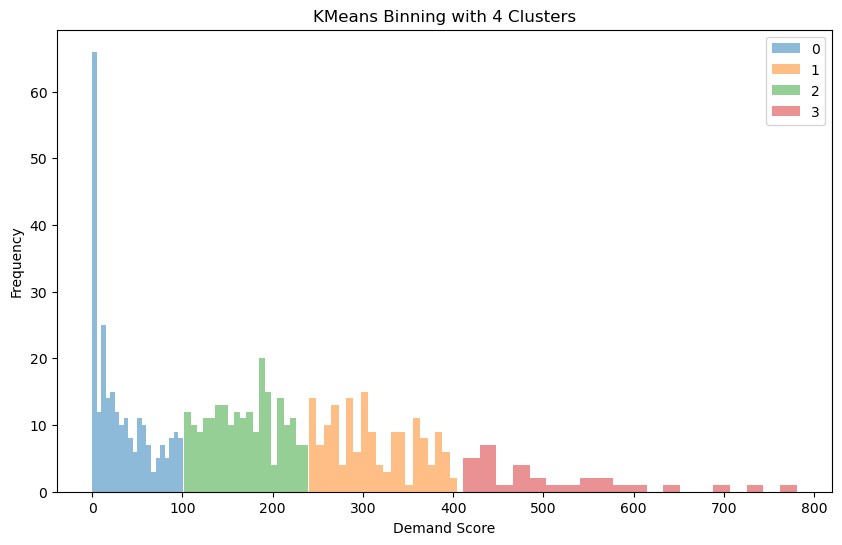

In [77]:
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.hist(final_df.loc[final_df['DEMAND_CATEGORY'] == cluster, 'DEMAND_SCORE'],
              bins=20, alpha=0.5, label=f'{cluster}')
plt.xlabel('Demand Score')
plt.ylabel('Frequency')
plt.title(f'KMeans Binning with {num_clusters} Clusters')
plt.legend()
plt.show()

In [78]:
# Create a dictionary to map cluster labels to category names
# assign according to the cluster numbers on the chart
cluster_mapping = {
    0: 'Lowest', 
    2: 'Low',
    1: 'Medium',
    3: 'Highest'
}

# Rename the categories in your DataFrame
final_df['DEMAND_CATEGORY'] = final_df['DEMAND_CATEGORY'].map(cluster_mapping)

c:\Users\Kuan Xin\anaconda3\envs\smu_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Kuan Xin\anaconda3\envs\smu_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Kuan Xin\anaconda3\envs\smu_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Kuan Xin\anaconda3\envs\smu_analytics\lib\site-packages\sklea

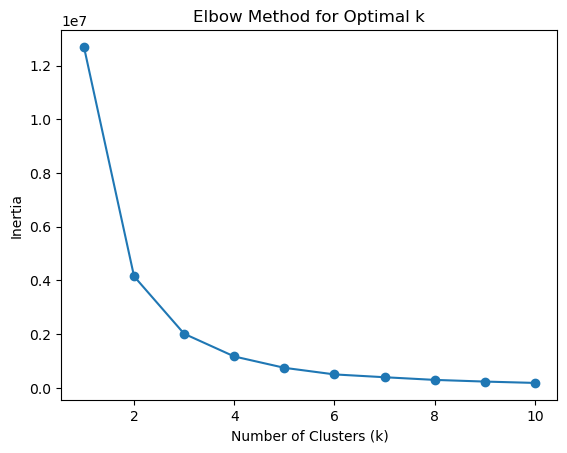

In [80]:
# Confirmation of K Values
# Use the Elbow Method to see if number of clusters is suitable
# Results show K = 3 or K = 4 as suitable.


def find_optimal_k(df, max_k=10):
    """Finds the optimal k using the elbow method."""
    inertia = []
    
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(df[['DEMAND_SCORE']])
        inertia.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.plot(range(1, max_k + 1), inertia, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

# Run the function to find the optimal k
find_optimal_k(final_df)

# HOW TO READ
# Look for drop in inertia as K value increases
# We want a reasonably high K value.
# Around K = 3 or 4, there is a significant drop in inertia.

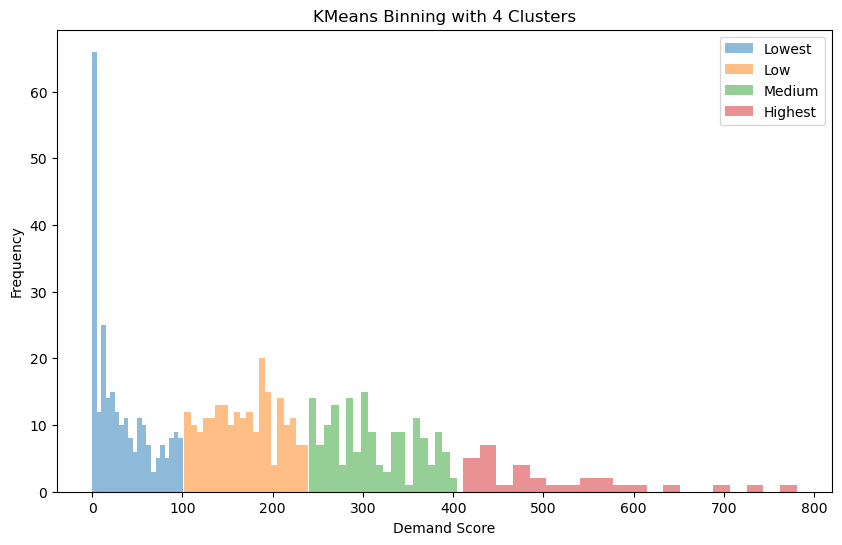

In [81]:
plt.figure(figsize=(10, 6))
for cluster in ['Lowest','Low','Medium','Highest']:
    plt.hist(final_df.loc[final_df['DEMAND_CATEGORY'] == cluster, 'DEMAND_SCORE'],
              bins=20, alpha=0.5, label=f'{cluster}')
plt.xlabel('Demand Score')
plt.ylabel('Frequency')
plt.title(f'KMeans Binning with {num_clusters} Clusters')
plt.legend()
plt.show()

In [82]:
final_df

,station_id,station_name,capacity,lng,lat,MEAN_WEEKLY_TRIPS,NORMALISED_CAPACITY,DEMAND_SCORE,DEMAND_CATEGORY
0,5772.05,Morton St & Greenwich St,56,-74.008870,40.731150,0.0,0.441667,0.000000,Lowest
1,6560.15,Broadway & W 38 St,68,-73.987349,40.752973,511.0,0.541667,234.719333,Low
2,7727.07,Amsterdam Ave & W 119 St,29,-73.959621,40.808625,0.0,0.216667,0.000000,Lowest
3,6569.08,W 35 St & Dyer Ave,41,-73.997402,40.754692,206.0,0.316667,140.972667,Low
4,7023.04,W 59 St & 10 Ave,117,-73.988038,40.770513,341.0,0.950000,17.391000,Lowest
...,...,...,...,...,...,...,...,...,...
657,8416.10,W 186 St & St Nicholas Ave,26,-73.931308,40.852253,8.0,0.191667,6.474667,Lowest
658,4846.01,South St & Whitehall St,55,-74.012342,40.701221,313.0,0.433333,177.679667,Low
659,6890.01,W 53 St & 10 Ave,29,-73.990617,40.766697,424.0,0.216667,332.557333,Medium
660,6483.06,W 36 St & 7 Ave,38,-73.989539,40.752149,173.0,0.291667,122.714667,Low


In [83]:
# Make sure mean weekly trips is an integer
final_df['MEAN_WEEKLY_TRIPS'] = final_df['MEAN_WEEKLY_TRIPS'].astype(int)

# Write to file
final_df.to_csv('station_with_demand.csv', index=False)